In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

c:\Users\afias\anaconda3\envs\dev\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# read data
# Read nyc data
nyc_df = pd.read_csv(Path('../Data Cleaning/encoded_data.csv'), index_col=0)

# Display sample data
nyc_df.head()

,trip_length_miles,trip_time_seconds,base_passenger_fare_dollars,tolls_dollars,black_car_fund_dollars,sales_tax_dollars,congestion_surcharge_dollars,airport_fee_dollars,tip_dollars,driver_pay_dollars,...,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,pickup_borough_Staten Island,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,2.06,660,23.87,0.0,0.72,2.12,0.00,0.0,0.0,14.02,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4.38,1379,41.66,0.0,1.25,3.70,0.00,0.0,0.0,33.24,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.39,590,34.03,0.0,1.02,3.02,2.75,0.0,0.0,45.18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.24,461,35.71,0.0,1.07,3.17,0.00,0.0,0.0,31.67,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.76,1029,27.69,0.0,0.83,2.46,0.00,0.0,0.0,22.54,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
nyc_df['tip_or_no_tip'].value_counts()

tip_or_no_tip
False    9617
True     2383
Name: count, dtype: int64

In [4]:
nyc_df ['tip_or_no_tip']= np.where(nyc_df['tip_or_no_tip'] > 0, 1, 0)

In [5]:
# Split the data into X (features) and y (target)
X = nyc_df.drop(columns=['tip_or_no_tip'])

# X variable all features except the target
y = nyc_df['tip_or_no_tip']

In [6]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Print Shape of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 664)
(9000,)
(3000, 664)
(3000,)


In [8]:
# Check value count
nyc_df['tip_or_no_tip'].value_counts()

tip_or_no_tip
0    9617
1    2383
Name: count, dtype: int64

## Model && Fit the Data Instantiating Logistic Regression

In [9]:
# Declare a logistic regression model.
model = LogisticRegression()

In [10]:
# Fit and save the logistic regression model using the training data
lr_model = model.fit(X_train, y_train)

In [11]:
# Make a prediction using the testing data
predictions = model.predict(X_test)

pd.DataFrame(
    {
        'Prediction' : predictions,
        'Actual': y_test
    }
)

,Prediction,Actual
3128,0,0
3810,0,0
6023,0,0
121,0,0
3388,1,1
...,...,...
11964,0,0
3930,1,1
2271,1,1
7459,0,0


## Evaluate LR's performance 

In [12]:
# Print the balanced_accuracy score of the model
bal_acc_score = balanced_accuracy_score(y_test, predictions)
print(f'Balanced Accuracy Score: {bal_acc_score}')

Balanced Accuracy Score: 0.9983844911147011


In [13]:
# Print confusion matrix
print(confusion_matrix(y_test, predictions))

[[2381    0]
 [   2  617]]


In [14]:
# Print the classification report for the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2381
           1       1.00      1.00      1.00       619

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



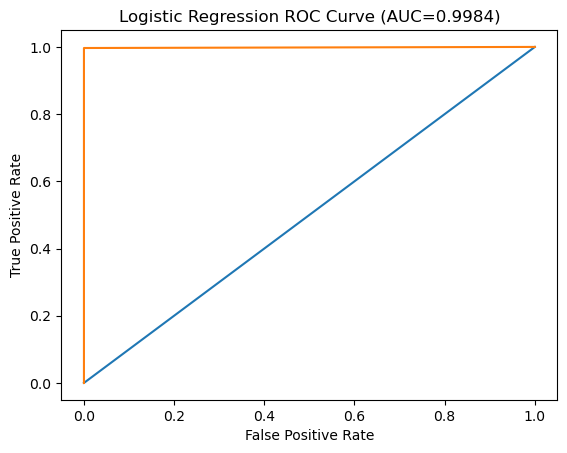

<Figure size 640x480 with 0 Axes>

In [17]:
# Import roc curve and auc and plot
from sklearn.metrics import roc_curve, auc
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)
plt.plot([0,1], [0,1])
plt.plot(fpr_test,tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Logistic Regression ROC Curve (AUC={auc_test})')
plt.show()
plt.savefig('../Images/LR_ROC')

## Observations

**Observation**: The model predicted and gave an `accuracy_score` of 99.83%. Although based on the `value_counts`, few of the fares were grouped as **tip** -  out of 12000 dataset, 2383 fares were tip whereas 9617 fares were categorized as **no tip**. Due to this imbalance, we can conclude that the model might have high accuracy score predicting all fares to have received tips. To resolve this, resampling will be implemented. 

## Predict a LR Model Implementing Resampled Training Data

In [18]:
# Import RandomOverSampler 
from imblearn.over_sampling import RandomOverSampler

In [19]:
# Instantiate the random oversampler model
ros = RandomOverSampler(random_state=1)

In [20]:
# Fit the original training data to the random_oversampler model
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

In [21]:
# Count the distinct values of the resampled labels data
y_oversampled.value_counts()

tip_or_no_tip
0    7236
1    7236
Name: count, dtype: int64

In [22]:
# Instatiate LR Model
model_oversampled = LogisticRegression(solver='lbfgs',random_state=1)

In [23]:
# Fit model using the resampled training data/
model_oversampled.fit(X_oversampled, y_oversampled)

LogisticRegression(random_state=1)

In [24]:
# Make prediction using testing data
y_oversampled_pred = model_oversampled.predict(X_test)

## Evaluating LR  Oversampled Performance Metric 

In [25]:
# Print the balanced_accuracy score of the model 
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_oversampled_pred)}')

Balanced Accuracy Score: 0.9991922455573505


In [26]:
# Generate a confusion matrix for the model
print(confusion_matrix(y_test, y_oversampled_pred))

[[2381    0]
 [   1  618]]


In [27]:
# Print the classification report for the model
print(classification_report_imbalanced(y_test, y_oversampled_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00      2381
          1       1.00      1.00      1.00      1.00      1.00      1.00       619

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      3000



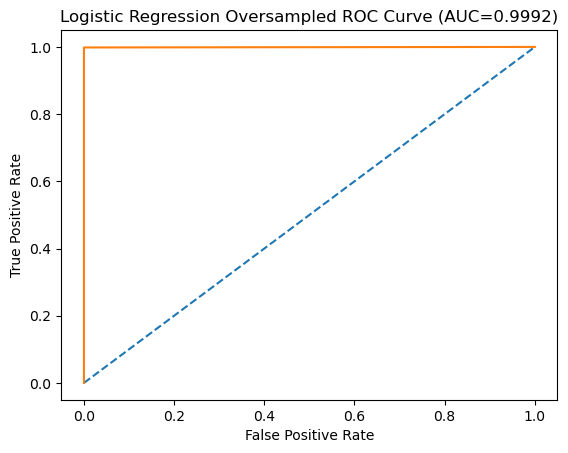

<Figure size 640x480 with 0 Axes>

In [28]:
# Roc_curve for LR Sampled Data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_oversampled_pred)
plt.plot([0,1], [0,1], '--')
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)
plt.plot(fpr_test,tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Logistic Regression Oversampled ROC Curve (AUC={auc_test})')
plt.show()
plt.savefig('../Images/LRO_ROC')

## XGBoost

In [ ]:
# XGBoost will be used to avoid overfitting while increasing speed and efficiency
#Install XGBoost
from IPython.display import clear_output
try:
  ! pip install xgboost
except:
  print("Error installing libraries")
finally:
  clear_output()
  print("Libraries successfully installed")

In [29]:
# Import xgboost
import xgboost as xgb

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
# Use XgboostClassifier to fit model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
# Predict output using test data
expected_y  = y_test
pred_y = model.predict(X_test)

In [33]:
# Print confusion matrix and classification report
print(confusion_matrix(expected_y, pred_y))
print(classification_report(expected_y, pred_y))

[[2409    0]
 [   2  589]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2409
           1       1.00      1.00      1.00       591

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



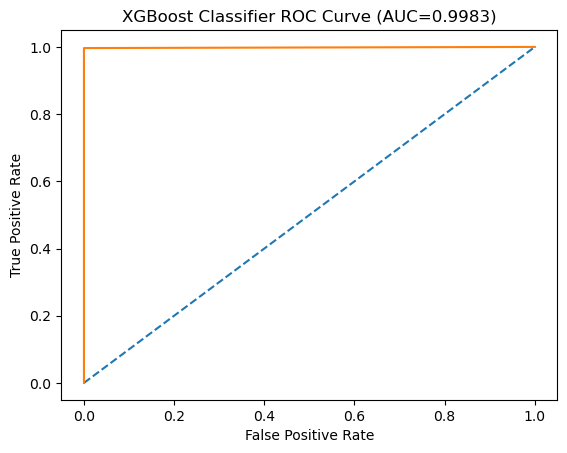

<Figure size 640x480 with 0 Axes>

In [34]:
# Plot ROC_Curve for XGBoost
fpr_test, tpr_test, thresholds_test = roc_curve(expected_y, pred_y)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)
plt.plot([0,1], [0,1], '--')
plt.plot(fpr_test,tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'XGBoost Classifier ROC Curve (AUC={auc_test})')
plt.show()
plt.savefig('../Images/XGB_ROC')